In [1]:
from model import *
from agents import *
from utility import *
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner, BatchRunnerMP
import pathos
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output
import time
import multiprocessing as mp

In [14]:
fixed_params={"no_of_neighbors":3, "network_type":2, "beta_component":.3, "similarity_treshold":.025, "social_influence":0.01, "swingers":1, "malicious_N":1, "echo_threshold":0.25, "all_majority":False}
variable_params={"N":range(50,1001,50)}
model_reporters={"Percentage A":compute_opinions}

batch = BatchRunnerMP(Network, 
                    max_steps=150,
                    fixed_parameters=fixed_params,
                    variable_parameters=variable_params,
                    model_reporters=model_reporters, nr_processes=1)
batch.run_all()

20it [06:29, 32.80s/it]


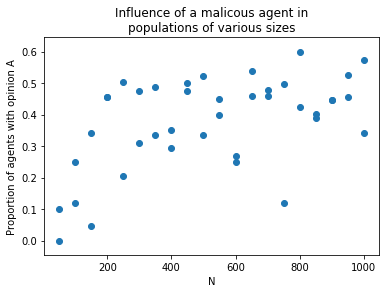

In [41]:
# run_data = pd.concat([run_data,batch.get_model_vars_dataframe()])
plt.scatter(run_data.N, run_data['Percentage A'])
plt.xlabel('N')
plt.ylabel('Proportion of agents with opinion A')
plt.title('Influence of a malicous agent in\npopulations of various sizes')
plt.savefig('N_A.png')
plt.show()

In [35]:
fixed_params={"N":1000,"no_of_neighbors":3, "network_type":2, "beta_component":.3, "similarity_treshold":.025, "swingers":1, "malicious_N":1, "echo_threshold":0.25, "all_majority":False}
variable_params={"social_influence":np.linspace(0.01,0.1,50)}
model_reporters={"Percentage A":compute_opinions}

batch_social = BatchRunnerMP(Network, 
                    max_steps=150,
                    fixed_parameters=fixed_params,
                    variable_parameters=variable_params,
                    model_reporters=model_reporters, nr_processes=1)
batch_social.run_all()

50it [35:53, 42.63s/it]


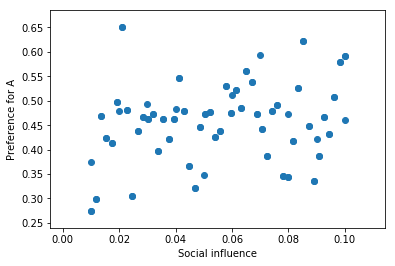

In [42]:
run_data_social = pd.concat([run_data_social,batch_social.get_model_vars_dataframe()])
plt.scatter(run_data_social.social_influence, run_data_social['Percentage A'])
plt.xlabel('Social influence')
plt.ylabel('Preference for A')
plt.savefig('social_A.png')
plt.show()

In [37]:
import scipy.stats as sts
sts.pearsonr(run_data_social.social_influence, run_data_social['Percentage A'])

(0.22537335597679695, 0.08338706371804858)